#                                Aerial Cactus Identification - from kaggle
## Determine whether an image contains a columnar cactus

We will be using data from Kaggle competition of binary classification of Cactus images
* https://www.kaggle.com/c/aerial-cactus-identification/kernels

## Starting with Images Structure and Processing


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
from PIL import Image
from pylab import *
import cv2 as cv
import cv2
%matplotlib inline

filterwarnings('ignore')

In [0]:
DATA_IN_GOOGLE_CLOUD = False
DATA_ON_LOCAL_MACHINE = True
DATA_IN_KAGGLE = False
I_AM_IN_KAGGLE_KERNEL = False

PATH =''

import sys
I_AM_IN_COLAB = 'google.colab' in sys.modules

if (I_AM_IN_COLAB):
    from google.colab import files
    from google.colab import drive

In [4]:
if DATA_ON_LOCAL_MACHINE:
    uploaded = files.upload()
    #df = pd.read_csv(<filename>)`

Saving 000c8a36845c0208e833c79c1bffedd1.jpg to 000c8a36845c0208e833c79c1bffedd1.jpg
Saving 000d1e9a533f62e55c289303b072733d.jpg to 000d1e9a533f62e55c289303b072733d.jpg
Saving 0004be2cfeaba1c0361d39e2b000257b.jpg to 0004be2cfeaba1c0361d39e2b000257b.jpg
Saving 15f3fdf941a0de5746d315f38a21507a.jpg to 15f3fdf941a0de5746d315f38a21507a.jpg


## Image data handeling & structure
* Read : image = plt.imread('filename.jpg')
* Show: plt.imshow(image)
### Color JPG
* numpy array of shape (im_height, im_width, channles)
* Data type is int 0-255
* or Float of 0-1
* 3 channles of R, G, B
* Red channle: image[:,:,0]
* Green channle: image[:,:,1]
* Blue channle:image[:,:,2]

Lest View the data


In [5]:
image = plt.imread('0004be2cfeaba1c0361d39e2b000257b.jpg')
image.shape

(32, 32, 3)

In [6]:
## Red channle
## green channle
## blue channle
image[:,:,0], image[:,:,1], image[:,:,2]

(array([[136, 134, 147, ..., 152, 147, 157],
        [124, 161, 158, ..., 163, 147, 145],
        [161, 160, 158, ..., 150, 161, 129],
        ...,
        [137, 197, 110, ..., 159, 145, 156],
        [150, 169, 150, ..., 167, 152, 152],
        [183, 115, 165, ..., 179, 142, 139]], dtype=uint8),
 array([[138, 136, 148, ..., 129, 124, 134],
        [126, 163, 159, ..., 140, 126, 124],
        [163, 162, 159, ..., 129, 140, 108],
        ...,
        [111, 171,  84, ..., 132, 118, 129],
        [124, 143, 124, ..., 140, 123, 123],
        [157,  89, 139, ..., 150, 113, 110]], dtype=uint8),
 array([[125, 125, 140, ..., 135, 130, 140],
        [113, 152, 151, ..., 146, 131, 129],
        [150, 151, 151, ..., 134, 145, 113],
        ...,
        [122, 182,  95, ..., 149, 135, 146],
        [135, 154, 137, ..., 157, 141, 143],
        [168, 100, 152, ..., 168, 133, 130]], dtype=uint8))

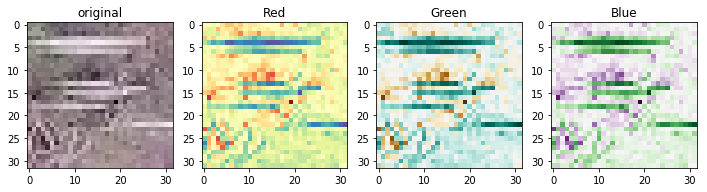

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('original');
plt.subplot(1, 4, 2)
plt.imshow(image[:,:,0], cmap='Spectral')
plt.title('Red');
plt.subplot(1, 4, 3)
plt.imshow(image[:,:,1], cmap='BrBG')
plt.title('Green');
plt.subplot(1, 4, 4)
plt.imshow(image[:,:,2], cmap='PRGn')
plt.title('Blue');


In [8]:
image_test = image / 255.0 # normalize to [0...1] scale
image_test = image_test.reshape(32 * 32, 3)  # Flatten each channle
image_test.shape

(1024, 3)

## Acsess pixels in the image
we can access any pixel with indexing and slicing
* image rows 10-20: image[10:20,:,:]
* image columns: image[:,30:80,:]

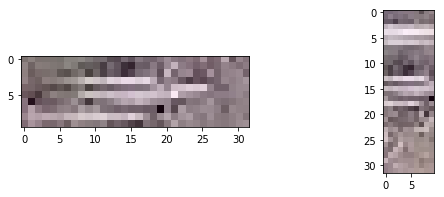

In [9]:
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.imshow(image[10:20,:,:])
plt.subplot(1, 2, 2)
plt.imshow(image[:,10:20,:])

##  Image Processing
* decoloring with MiniBatch for better use of our computing resources
* resize : cv.resize(image, dsize=(new_x,new_y))
* Edges & contoures

In [0]:
# MiniBatching

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(image_test)
new_colors = kmeans.cluster_centers_[kmeans.predict(image_test)]


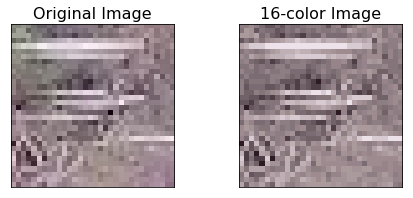

In [11]:
image_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 3),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16);

Text(0.5, 1.0, 'enlarge to 128px')

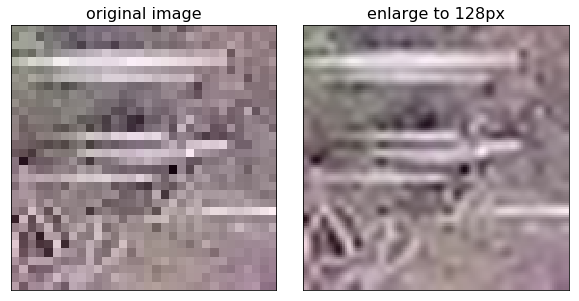

In [12]:
# example of resizing image size from 32 to 128px

image = plt.imread('0004be2cfeaba1c0361d39e2b000257b.jpg')
res=cv.resize(image,dsize=(128,128),interpolation=cv.INTER_CUBIC)

fig, ax = plt.subplots(1, 2, figsize=(10, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.1)
ax[0].imshow(image)
ax[0].set_title('original image', size=16)
ax[1].imshow(res)
ax[1].set_title('enlarge to 128px', size=16)



In [0]:
image = plt.imread('0004be2cfeaba1c0361d39e2b000257b.jpg')

im = array(Image.open('0004be2cfeaba1c0361d39e2b000257b.jpg').convert('L'))

res=cv.resize(im,dsize=(128,128),interpolation=cv.INTER_CUBIC)

edges = cv2.Canny(res,100,230)

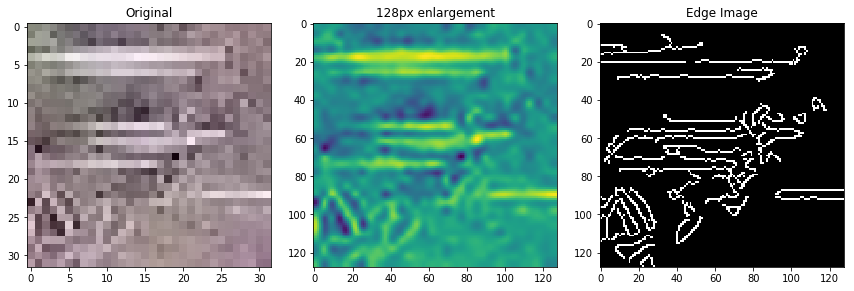

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(131),plt.imshow(image)
plt.title('Original')

plt.subplot(132),plt.imshow(res)
plt.title('128px enlargement')

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')

plt.tight_layout()
plt.show()

In [0]:
im = cv2.imread('0004be2cfeaba1c0361d39e2b000257b.jpg')
# im=cv.resize(im,dsize=(128,128),interpolation=cv.INTER_CUBIC)
           
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,177,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

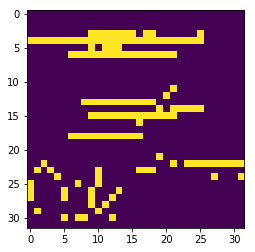

In [16]:
plt.imshow(image)

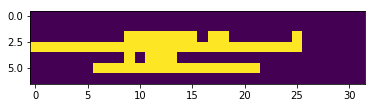

In [17]:
plt.imshow(image[1:8])

In [18]:
new_image = image[4:5]
new_image

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0,   0,   0,   0,   0,   0]], dtype=uint8)

(0.5, 127.5, 0.5, 127.5)

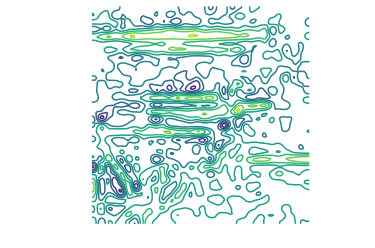

In [19]:
# read image to array
# im = array(Image.open('0004be2cfeaba1c0361d39e2b000257b.jpg').convert('L'))
# create a new figure
figure()
# don't use colors
# gray()
# show contours with origin upper left corner
contour(res, origin='image')
axis('equal')
axis('off')

In [0]:
image3 = plt.imread('000c8a36845c0208e833c79c1bffedd1.jpg')
# plt.imshow(plt.imread('000c8a36845c0208e833c79c1bffedd1.jpg'))

im3 = array(Image.open('000c8a36845c0208e833c79c1bffedd1.jpg').convert('L'))

res3 = cv.resize(im3, dsize=(128,128), interpolation=cv.INTER_CUBIC)

edges3 = cv2.Canny(res3,100,230)

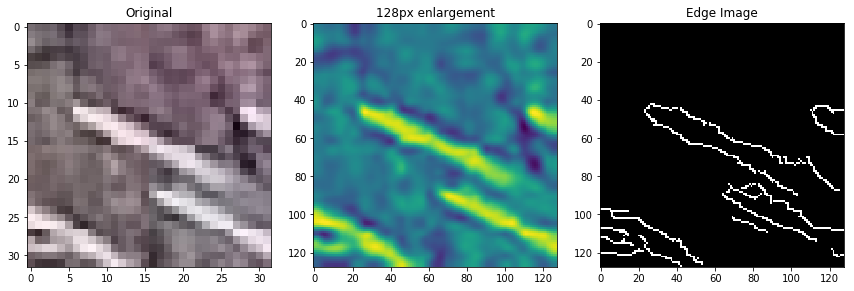

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(131),plt.imshow(image3)
plt.title('Original')


plt.subplot(132),plt.imshow(res3)
plt.title('128px enlargement')


plt.subplot(133),plt.imshow(edges3,cmap = 'gray')
plt.title('Edge Image')

plt.tight_layout()
plt.show()

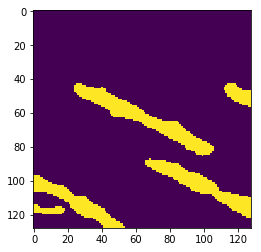

In [23]:
im3 = cv2.imread('000c8a36845c0208e833c79c1bffedd1.jpg')
im3 = cv.resize(im3,dsize=(128,128),interpolation=cv.INTER_CUBIC)

           
imgray3 = cv2.cvtColor(im3,cv2.COLOR_BGR2GRAY)
ret,thresh3 = cv2.threshold(imgray3,177,255,0)
image3, contours, hierarchy = cv2.findContours(thresh3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# img3 = cv2.drawContours(image3, [cnt], 0, (0,255,0), 3)
plt.imshow(image3)

(0.5, 127.5, 0.5, 127.5)

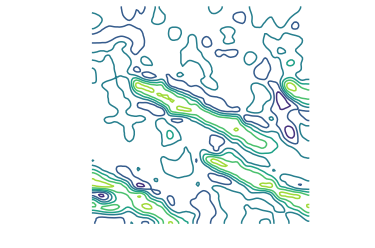

In [24]:
# read image to array
# im3 = array(Image.open('000c8a36845c0208e833c79c1bffedd1.jpg').convert('L'))
# create a new figure
figure()
# don't use colors
# gray()
# show contours with origin upper left corner
contour(res3, origin='image')
axis('equal')
axis('off')

# **LET'S GET STARTED **

## **1. Loading the data from Kaggel to Colab **

In [25]:
import os
DATA_IN_KAGGLE=True
I_AM_IN_COLAB=True
if DATA_IN_KAGGLE and I_AM_IN_COLAB:
  os.environ['KAGGLE_USERNAME']= 'gordontal'
  os.environ['KAGGLE_KEY']= '29e2a4d2b496126821ddadfd047092e8'
  !kaggle competitions download -c aerial-cactus-identification # api copied from kaggle
 # !kaggle competitions download -c aerial-cactus-identification # api copied from kaggle
  
  df = pd.read_csv('train.csv')

  sample_submission = pd.read_csv('sample_submission.csv')

  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 43.6MB/s]
  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 75.3MB/s]
  0% 0.00/4.20M [00:00<?, ?B/s]
100% 4.20M/4.20M [00:00<00:00, 38.5MB/s]
 88% 17.0M/19.2M [00:00<00:00, 84.5MB/s]
100% 19.2M/19.2M [00:00<00:00, 76.1MB/s]


In [26]:
!ls -lt

total 24836
-rw-r--r-- 1 root root 20148140 Sep 25 11:00 train.zip
-rw-r--r-- 1 root root  4408369 Sep 25 11:00 test.zip
-rw-r--r-- 1 root root   164014 Sep 25 11:00 sample_submission.csv
-rw-r--r-- 1 root root   682514 Sep 25 11:00 train.csv
-rw-r--r-- 1 root root     1157 Sep 25 10:55 15f3fdf941a0de5746d315f38a21507a.jpg
-rw-r--r-- 1 root root     1170 Sep 25 10:55 0004be2cfeaba1c0361d39e2b000257b.jpg
-rw-r--r-- 1 root root     1178 Sep 25 10:55 000d1e9a533f62e55c289303b072733d.jpg
-rw-r--r-- 1 root root     1152 Sep 25 10:55 000c8a36845c0208e833c79c1bffedd1.jpg
drwxr-xr-x 1 root root     4096 Aug 27 16:17 sample_data


In [27]:
df.sample(5)

,id,has_cactus
15720,e56f7abc98bae5720eba8563a31c8377.jpg,1
11971,ad55f324f511caf714443f951e1ef720.jpg,1
16771,f526aae92b4fcfcae129ad12fc15c8e8.jpg,1
2060,1cefa5c6a214552edf3324f428734b96.jpg,1
4346,3d5aa5f48c42ff488cad43597dd59d50.jpg,1


In [0]:
!unzip train.zip

In [29]:
df.shape

(17500, 2)

In [30]:
df_sample = df.sample(6000, random_state=333)
df_sample['has_cactus'].value_counts()

1    4441
0    1559
Name: has_cactus, dtype: int64

## **we are in a 73% balanced ratio**

In [31]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_sample, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((4200, 2), (1800, 2))

In [32]:
df_train['has_cactus'].value_counts()

1    3085
0    1115
Name: has_cactus, dtype: int64

### this func will help us build a file name using the 'id' of an image, later to "imread it" !

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = plt.imread(fname)
  
  return image

### next we will build an array of the images with the same loc as thier labels in the train.csv

In [0]:
images = []

for i in range(len(df_train)):
  
   images.append(read_image(df_train.iloc[i]).flatten())
    
images = np.array(images)
    
labels = df_train['has_cactus'].values

In [35]:
images.shape, labels.shape

((4200, 3072), (4200,))

In [0]:
test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)
test_labels = df_test['has_cactus'].values

In [37]:
test_images.shape, test_labels.shape

((1800, 3072), (1800,))

## **Importing models & tools**

In [0]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import validation_curve



### report func for the train & test

In [0]:
def report(y, y_pred, classes):
  acc = accuracy_score(y, y_pred)
  
  cm = pd.DataFrame(confusion_matrix(y, y_pred), 
                   index = classes, 
                   columns = classes)
  rep = classification_report(y, y_pred)
  
  return 'accuracy_score: {:.3f}\n\n{}\n\n{}'.format(acc, cm, rep)

In [0]:
def test_report(test_labels, pred_test, classes):
  acc = accuracy_score(test_labels, pred_test)
  
  cm = pd.DataFrame(confusion_matrix(test_labels, pred_test), 
                   index = classes, 
                   columns = classes)
  rep = classification_report(test_labels, pred_test)
  
  return 'accuracy_score: {:.3f}\n\n{}\n\n{}'.format(acc, cm, rep)

# **MODEL 1 : DecisionTreeClassifier - As a base model !!!**

In [0]:
X = images
y = labels

### ploting a validation curve in order to find the proper 'max depth'

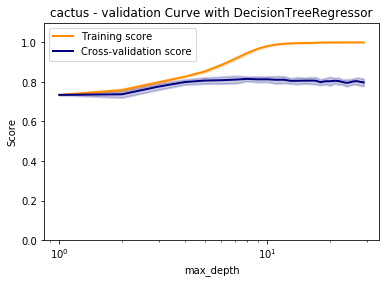

In [42]:
param='max_depth'
param_range = range(1,30)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, 
                                            param_name=param,
                                            param_range=param_range, 
                                             cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("cactus - validation Curve with DecisionTreeRegressor")
plt.xlabel(param)
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### looking at the Validation curve we can see that max_depth=5 will suit us best !

In [43]:
clf = DecisionTreeClassifier(max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1).fit(X, y) # class_weight={0: 2, 1: 1},
y_pred = clf.predict(X)

print(report(y, y_pred, ['no_cacatus', 'has_cactus']))

accuracy_score: 0.855

            no_cacatus  has_cactus
no_cacatus         669         446
has_cactus         165        2920

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1115
           1       0.87      0.95      0.91      3085

    accuracy                           0.85      4200
   macro avg       0.83      0.77      0.80      4200
weighted avg       0.85      0.85      0.85      4200



In [44]:
pred_test = clf.predict(test_images)

print(test_report(test_labels, pred_test, ['no_cacatus', 'has_cactus']))

accuracy_score: 0.828

            no_cacatus  has_cactus
no_cacatus         240         204
has_cactus         105        1251

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       444
           1       0.86      0.92      0.89      1356

    accuracy                           0.83      1800
   macro avg       0.78      0.73      0.75      1800
weighted avg       0.82      0.83      0.82      1800



# **MODEL 2 : RandomForestClassifier** + 2 experiments 

## 1. with " *enlargement* " - resizing to 128 x 128

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score,\
    GridSearchCV

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = cv2.imread(fname)
  image = cv.resize(image,dsize=(128,128),interpolation=cv.INTER_CUBIC)
  
  return image
##############################

images = []

for i in range(len(df_train)):
  
   images.append(read_image(df_train.iloc[i]).flatten())
    
images = np.array(images)
    
labels = df_train['has_cactus'].values
##############################

test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)
test_labels = df_test['has_cactus'].values
##############################

X1 = images

y = labels

test_images = test_images

In [47]:
clf = RandomForestClassifier(max_depth=5)

clf.fit(X1,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_pred = clf.predict(X1)

print('accuracy :', accuracy_score(y, y_pred), '\n')
print(classification_report(y, y_pred))

accuracy : 0.8859523809523809 

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1115
           1       0.87      0.99      0.93      3085

    accuracy                           0.89      4200
   macro avg       0.91      0.80      0.83      4200
weighted avg       0.89      0.89      0.88      4200



In [49]:
pred_test = clf.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test), '\n')

print(classification_report(test_labels, pred_test))

accuracy : 0.8694444444444445 

              precision    recall  f1-score   support

           0       0.89      0.53      0.67       444
           1       0.87      0.98      0.92      1356

    accuracy                           0.87      1800
   macro avg       0.88      0.76      0.79      1800
weighted avg       0.87      0.87      0.86      1800



##For indication of the classifier quality it is sometimmes useful to look at the area under the ROC curve

In [0]:
test_roc_labels = pd.DataFrame(data=test_labels)

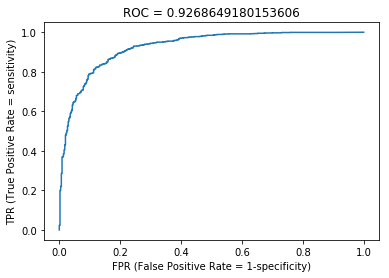

In [51]:
 scores = clf.predict_proba(test_images)
fpr, tpr, thresholds = roc_curve(test_roc_labels.values, scores[:,1])
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR (False Positive Rate = 1-specificity)')
plt.ylabel('TPR (True Positive Rate = sensitivity)')
plt.title('ROC = '+str(roc_auc_score(test_roc_labels.values, scores[:,1])));

## 2. predicting with the ***contours*** of the images

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = cv2.imread(fname)
  image = cv.resize(image,dsize=(128,128),interpolation=cv.INTER_CUBIC)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  ret,thresh = cv2.threshold(image,177,255,0)
  image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  return image
##############################

images = []

for i in range(len(df_train)):
  
   images.append(read_image(df_train.iloc[i]).flatten())
    
images = np.array(images)
    
labels = df_train['has_cactus'].values
##############################

test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)
test_labels = df_test['has_cactus'].values
##############################

X2 = images

y = labels

test_images = test_images

In [0]:
clf.fit(X2,y)

y_pred = clf.predict(X2)

In [54]:
pred_test = clf.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test), '\n')

print(classification_report(test_labels, pred_test))

accuracy : 0.7538888888888889 

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       444
           1       0.75      1.00      0.86      1356

    accuracy                           0.75      1800
   macro avg       0.88      0.50      0.43      1800
weighted avg       0.81      0.75      0.65      1800



# **MODEL 2 : RandomForestClassifier + GridSearchCV**

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = plt.imread(fname)
  
  return image

In [0]:
test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)

In [0]:
param_grid = {'max_depth': [20],
    'max_features': [5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 6, 8]}

In [0]:
clf = RandomForestClassifier(bootstrap=False, n_estimators=50)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [57]:
grid_search.fit(X,y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   55.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                     

In [58]:
print ("Best model:", grid_search.best_estimator_)
print ("Best parameters:", grid_search.best_params_)
print ("Best score:", grid_search.best_score_)

Best model: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best parameters: {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}
Best score: 0.87


In [62]:
pred_test = grid_search.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test))

accuracy : 0.8855555555555555


# XGBoost MODEL

In [0]:
from xgboost import XGBClassifier

In [0]:
clf = XGBClassifier()

In [65]:
clf.fit(X, y)

y_pred = clf.predict(X)

print('accuracy :', accuracy_score(y, y_pred))

accuracy : 0.9797619047619047


In [66]:
pred_test = clf.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test), '\n')

print(classification_report(test_labels, pred_test))

accuracy : 0.9322222222222222 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       444
           1       0.93      0.98      0.96      1356

    accuracy                           0.93      1800
   macro avg       0.93      0.88      0.90      1800
weighted avg       0.93      0.93      0.93      1800





---


# DEEP LEARNING

---





In [0]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

In [0]:
from keras.utils import to_categorical


y = to_categorical(y)
test_labels = to_categorical(test_labels)

In [0]:
def drow_history(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()    

In [0]:
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(3072,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

### I KNOW I FORGOT TO PUT A Convolution layer

In [111]:
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 1026      
Total params: 1,837,058
Trainable params: 1,837,058
Non-trainable params: 0
_________________________________________________________________


In [112]:
batch_size = 32

history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_images, test_labels))

Train on 4200 samples, validate on 1800 samples
Epoch 1/10
4200/4200 [==============================] - 4s 1ms/step - loss: 4.2791 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Epoch 2/10
4200/4200 [==============================] - 4s 903us/step - loss: 4.2790 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Epoch 3/10
4200/4200 [==============================] - 4s 895us/step - loss: 4.2790 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Epoch 4/10
4200/4200 [==============================] - 4s 899us/step - loss: 4.2790 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Epoch 5/10
4200/4200 [==============================] - 4s 891us/step - loss: 4.2790 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Epoch 6/10
4200/4200 [==============================] - 4s 891us/step - loss: 4.2790 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Epoch 7/10
4200/4200 [==============================] - 4s 899us/step - loss: 4.2790 - acc: 0.7345 - val_loss: 3.9758 - val_acc: 0.7533
Ep

In [0]:
drow_history(history, 'loss')

In [0]:
drow_history(history, 'acc')

In [117]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.9757969162199234
Test accuracy: 0.7533333333333333
